# Hyperparameter Tuning
### Create and tune the hyperparameters through a GridSearchCV of an SVC who is classifying images.
1. Create an SVC model to classify drawn digits into their corresponding value. 
    Split your data into a 50% train and 50% test subset.  
    Ensure that the shuffle parameter is off and you are not randomizing this dataset.

2. Create your grid search strategy intending to find the best model based on "F1-score".  
    Make sure your parameters include a wide range of values.

3. Create a DataFrame and visualizations showing statistics of each model tried in the search.

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [76]:
digits = datasets.load_digits()

X = digits.data
y = digits.target

df = pd.DataFrame(X, columns=digits.feature_names)
# df.head(10)
# np.unique(y)

fulldf = df.copy()
fulldf['target'] = y

# y[0:15]
print(fulldf.shape)
fulldf.head(30)

# cm = fulldf.corr()
# sns.heatmap(cm, cmap='coolwarm')


(1797, 65)


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


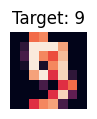

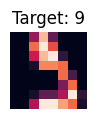

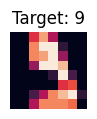

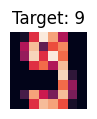

In [78]:
def display_image(n):
    image = digits.images[n]
    target = digits.target[n]
    plt.figure(figsize= (1,1))
    plt.imshow(image, cmap='rocket')
    plt.title(f'Target: {target}')
    plt.axis('off')
    plt.show()

display_image(9)
display_image(19)
display_image(29)
display_image(39)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

est = svm.SVC()
est.get_params()

param_grid = {
    'est__C': [0.1, 1, 10, 100, 1000],
    'est__gamma': [0.001, 0.01, 0.1, 1, 10],
    'est__kernel': ['linear', 'poly', 'rbf'],
    'est__degree': [2, 3, 4]
}

scaler = StandardScaler()
pipeline = Pipeline([
    ('scaler', scaler),
    ('est', est)
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')

grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)


0.9508070731727584
{'est__C': 10, 'est__degree': 2, 'est__gamma': 0.01, 'est__kernel': 'rbf'}


In [96]:
print(grid_search.cv_results_.keys())
search_results_cols = ['param_est__kernel', 'param_est__C', 'param_est__degree', 'param_est__gamma', 'mean_test_score', 'rank_test_score']

search_results = pd.DataFrame(grid_search.cv_results_)
search_results = search_results[search_results_cols]
search_results = search_results.sort_values(by='mean_test_score', ascending=False)
# search_results.shape
print(grid_search.best_score_)
print(grid_search.best_params_)
search_results.head(20)

search_results.to_csv('results1.csv')

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_est__C', 'param_est__degree', 'param_est__gamma', 'param_est__kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
0.9508070731727584
{'est__C': 10, 'est__degree': 2, 'est__gamma': 0.01, 'est__kernel': 'rbf'}


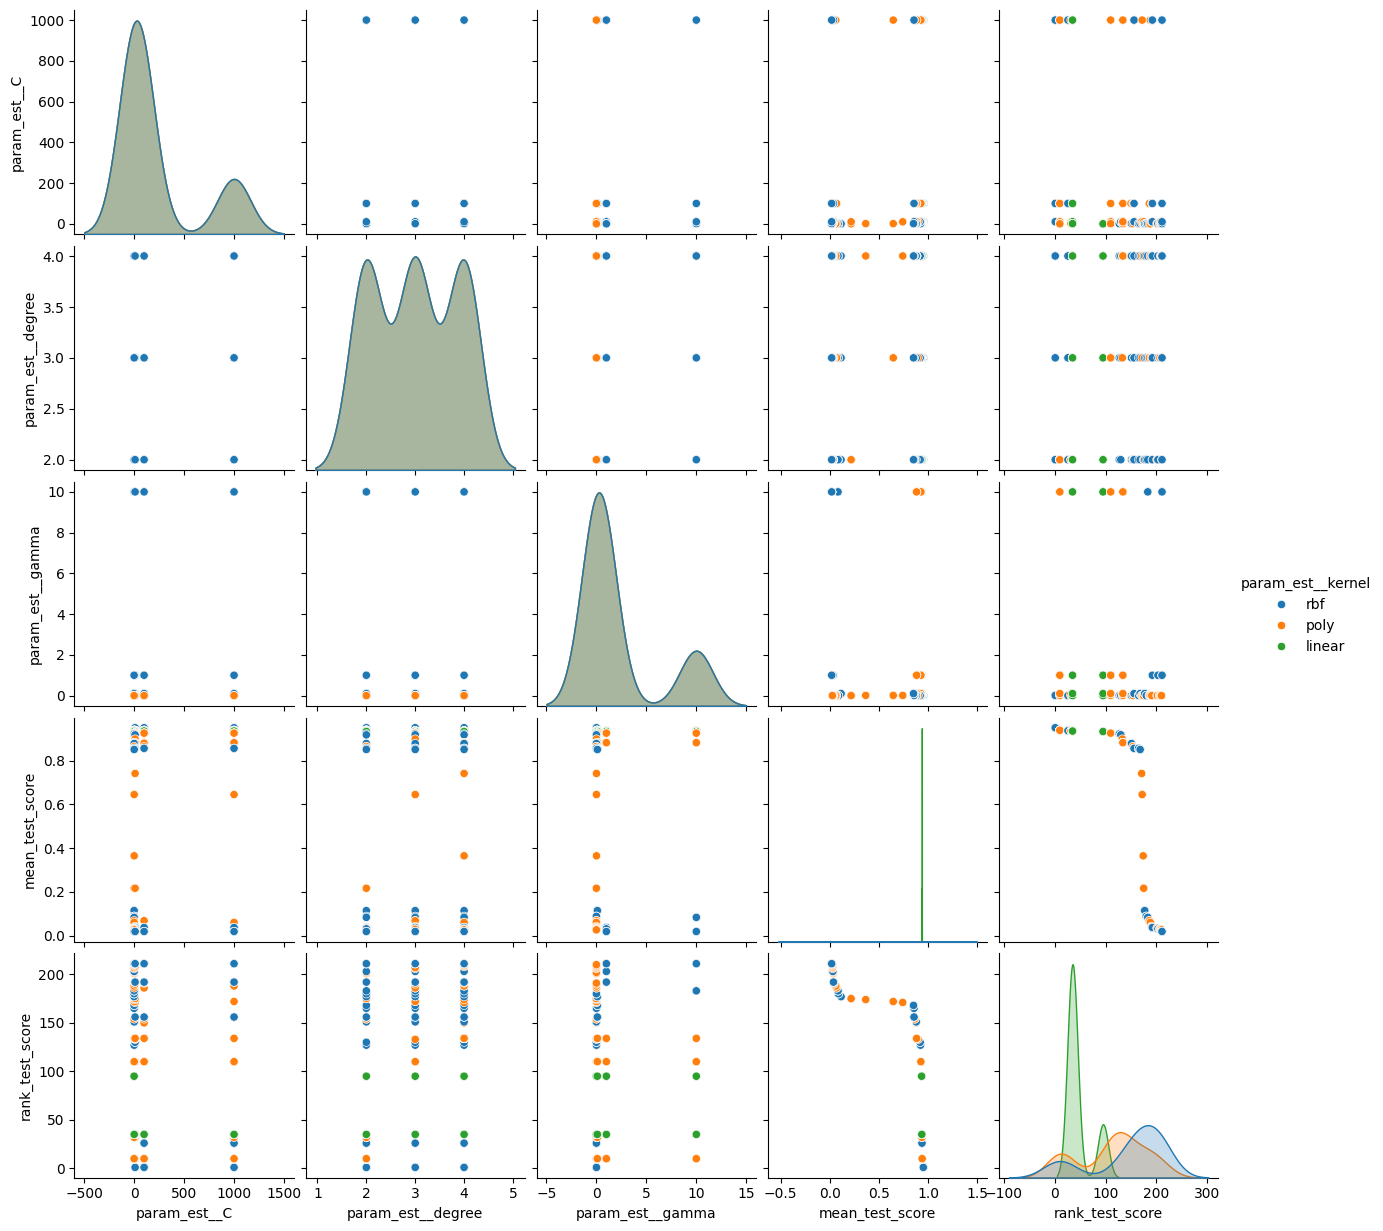

In [100]:
sns.pairplot(search_results, hue='param_est__kernel')
plt.show()

In [ ]:
est.fit(X_train, y_train)
pred = est.predict(X_test)

est_tuned = grid_search.best_estimator_
pred_tuned = est_tuned.predict(X_test)

